# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wikipedia
import string

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download("stopwords")
nltk.download("vader_lexicon")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")


plt.style.use("dark_background")

pd.set_option("display.max_columns", 500)
plt.style.use("dark_background")

%load_ext lab_black

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/luke/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/luke/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/luke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/luke/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/luke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/luke/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Sentiment analysis of all presidential candidate wikipedia pages (Words)

Scrape Wiki page, clean, and do sentiment analysis using NLTK library

In [2]:
def sentiment_of_wiki_page_words(title):
    # grab text from wiki page
    wiki = wikipedia.page(title, auto_suggest=False)
    text = wiki.content

    # split into words
    word_tokens = word_tokenize(text)

    # Remove stop words and punctuation

    stops = stopwords.words("english")
    for n in string.punctuation:
        stops.append(n)

    additional_stops = [
        "==",
        "''",
        "'s",
        "``",
        "``",
        "———",
        "ISBN",
        "===",
        "Party",
        "party",
        "United",
        "united",
    ]
    for stop in additional_stops:
        stops.append(stop)

    filtered_text = [w for w in word_tokens if not w.lower() in stops]

    # Dataframe to store results
    sendf = pd.DataFrame(filtered_text, columns=["text"])

    # Sentiment analysis object
    sid = SentimentIntensityAnalyzer()

    # Apply sentiment analysis to each word
    sendf[["neg", "neu", "pos", "compund"]] = (
        sendf["text"].apply(sid.polarity_scores).apply(pd.Series)
    )
    # Remove neutral words
    sendf = sendf[sendf.compund != 0.0].drop_duplicates()

    # Calculate sum, mean, and median scores
    sum_score = sendf["compund"].sum()
    mean_score = sendf["compund"].mean()
    median_score = sendf["compund"].median()

    # return f"sum score = {round(sum_score, 3)}, mean score = {round(mean_score,3)}, median score = {round(median_score,3)}"
    return sum_score, mean_score, median_score
    # return sendf

In [3]:
list_of_candidates = [
    "Joe Biden",
    "Robert F. Kennedy Jr.",
    "Marianne Williamson",
    "Doug Burgum",
    "Chris Christie",
    "Ron DeSantis",
    "Larry Elder",
    "Nikki Haley",
    "Asa Hutchinson",
    "Mike Pence",
    "Vivek Ramaswamy",
    "Tim Scott",
    "Corey Stapleton",
    "Francis X. Suarez",
    "Donald Trump",
]

In [4]:
df_pagesen = pd.DataFrame(
    columns=["Candidate", "sum_score", "mean_score", "median_score"]
)
for candidate in list_of_candidates:
    raw_results = sentiment_of_wiki_page_words(candidate)

    sum_score = raw_results[0]
    mean_score = raw_results[1]
    median_score = raw_results[2]

    new_row = {
        "Candidate": candidate,
        "sum_score": sum_score,
        "mean_score": mean_score,
        "median_score": median_score,
    }
    new_row = pd.DataFrame.from_dict(new_row, orient="index").T

    df_pagesen = pd.concat([df_pagesen, new_row])

df_pagesen["mean_score"] = df_pagesen["mean_score"].astype(float).round(4)
df_pagesen["party"] = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

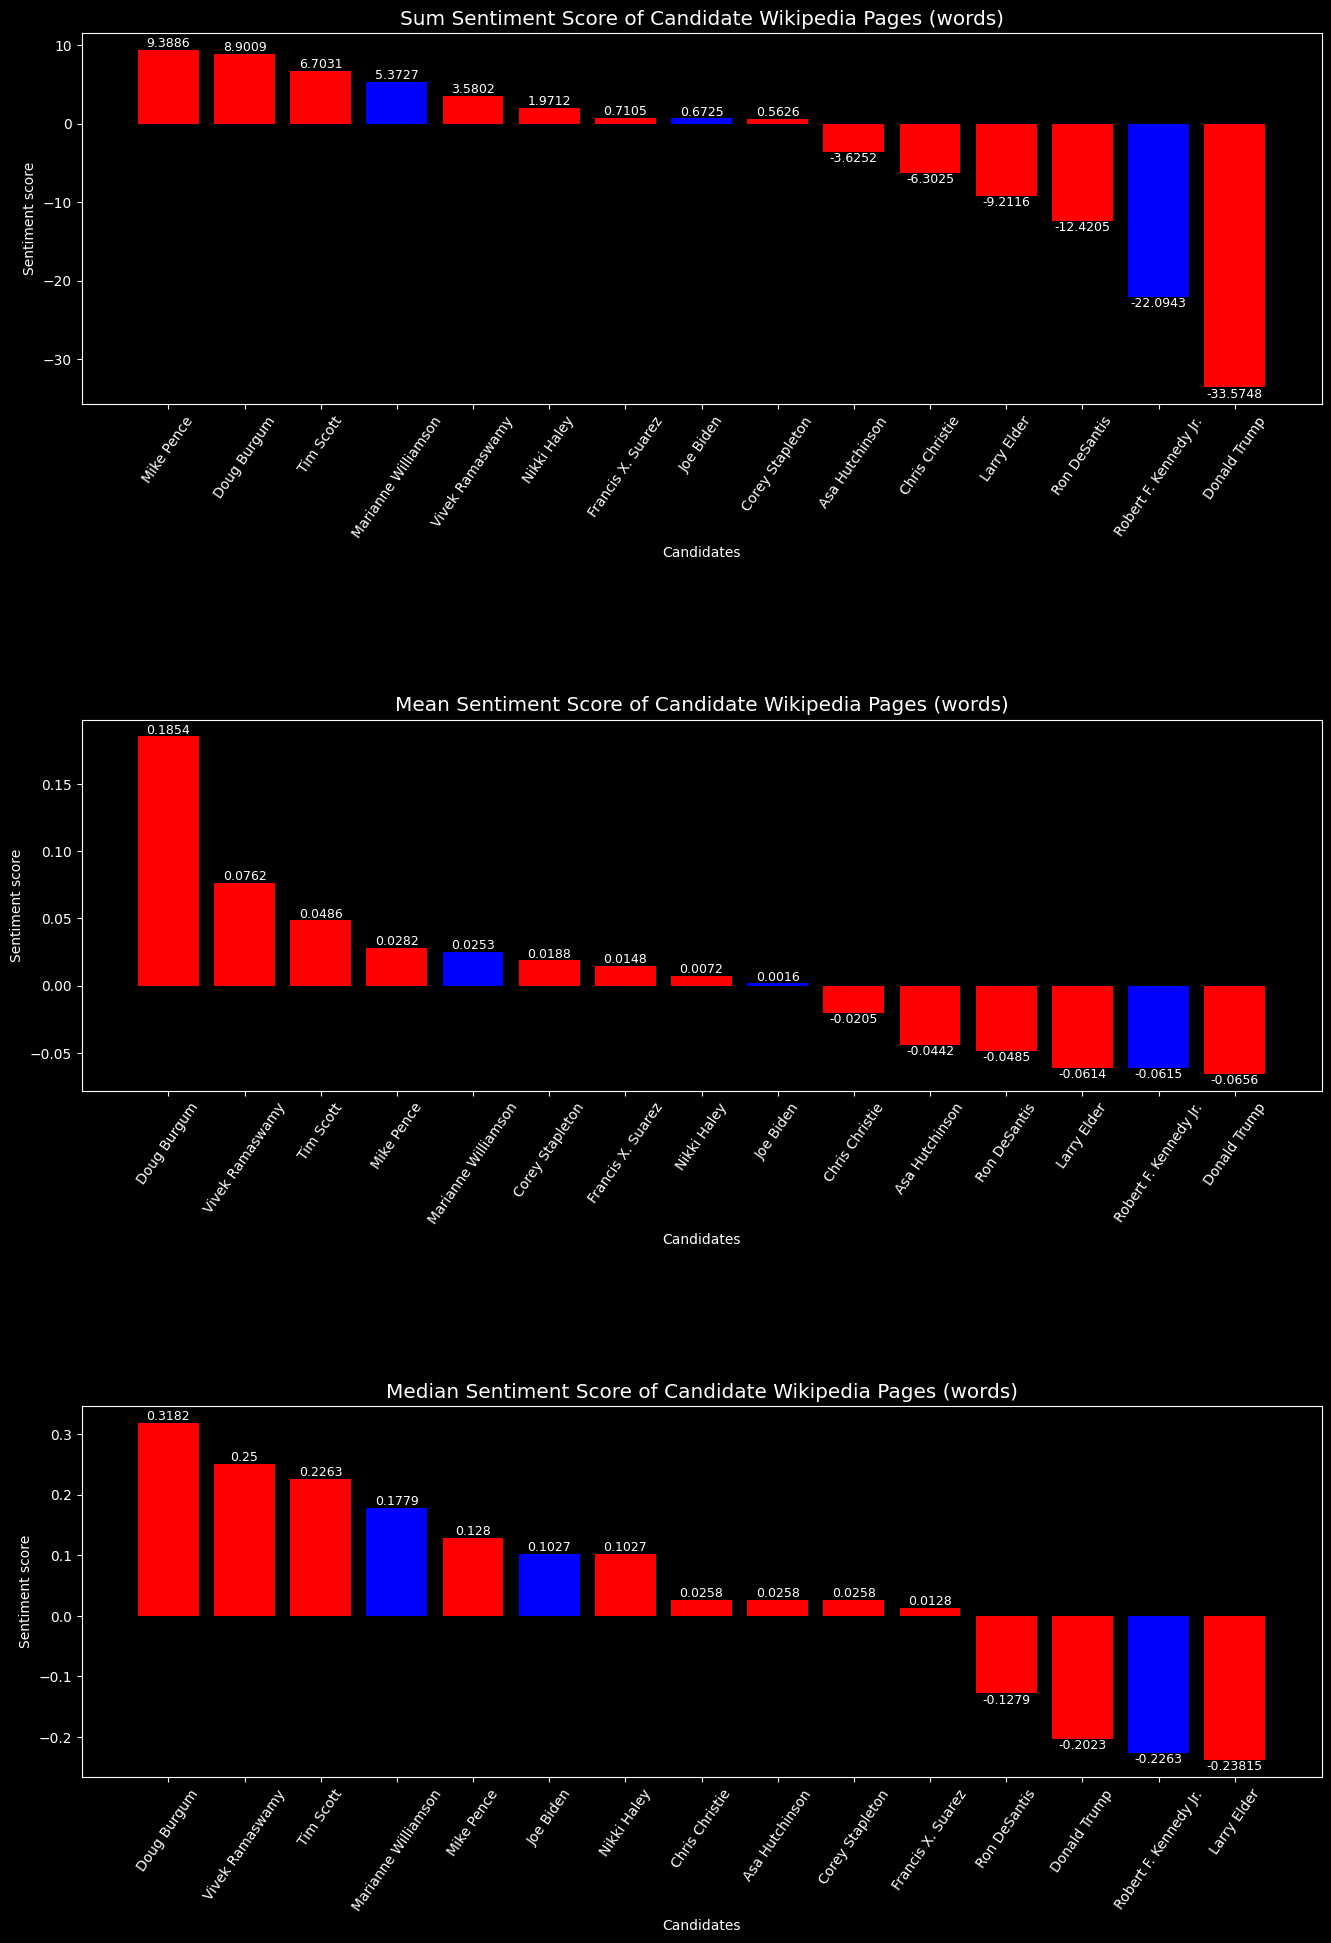

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 16))
plt.rc("font", size=12)  # controls default text sizes
plt.rc("axes", labelsize=16)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)

plt.subplots_adjust(top=1.2)  # Increase top margin

# Sum score
sum_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="sum_score", ascending=False)["party"]
]

p1 = ax1.bar(
    x=df_pagesen.sort_values(by="sum_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="sum_score", ascending=False)["sum_score"],
    data=df_pagesen,
    color=sum_colors,
)

ax1.set_ylabel("Sentiment score")
ax1.set_xlabel("Candidates")
ax1.set_title("Sum Sentiment Score of Candidate Wikipedia Pages (words)")
ax1.bar_label(p1, label_type="edge", fontsize=9)

ax1.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the first subplot

# Mean score
mean_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="mean_score", ascending=False)["party"]
]

p2 = ax2.bar(
    x=df_pagesen.sort_values(by="mean_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="mean_score", ascending=False)["mean_score"],
    data=df_pagesen,
    color=mean_colors,
)

ax2.set_ylabel("Sentiment score")
ax2.set_xlabel("Candidates")
ax2.set_title("Mean Sentiment Score of Candidate Wikipedia Pages (words)")
ax2.bar_label(p2, label_type="edge", fontsize=9)

ax2.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the second subplot

# Median score
median_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="median_score", ascending=False)["party"]
]

p3 = ax3.bar(
    x=df_pagesen.sort_values(by="median_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="median_score", ascending=False)["median_score"],
    data=df_pagesen,
    color=median_colors,
)

ax3.set_ylabel("Sentiment score")
ax3.set_xlabel("Candidates")
ax3.set_title("Median Sentiment Score of Candidate Wikipedia Pages (words)")
ax3.bar_label(p3, label_type="edge", fontsize=9)

ax3.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the third subplot

plt.subplots_adjust(hspace=0.85)  # Adjust the vertical spacing between subplots

plt.show()

# Sentiment analysis of all presidential candidate wikipedia pages (Sentences)

In [6]:
def sentiment_of_wiki_page_sentences(title):
    # grab text from wiki page
    wiki = wikipedia.page(title, auto_suggest=False)
    text = wiki.content

    # split into sentences
    word_tokens = sent_tokenize(text)

    # Remove stop words and punctuation

    stops = stopwords.words("english")
    for n in string.punctuation:
        stops.append(n)

    additional_stops = [
        "==",
        "''",
        "'s",
        "``",
        "``",
        "———",
        "ISBN",
        "===",
        "Party",
        "party",
        "United",
        "united",
    ]
    for stop in additional_stops:
        stops.append(stop)

    filtered_text = [w for w in word_tokens if not w.lower() in stops]

    # Dataframe to store results
    sendf = pd.DataFrame(filtered_text, columns=["text"])

    # Sentiment analysis object
    sid = SentimentIntensityAnalyzer()

    # Apply sentiment analysis to each word
    sendf[["neg", "neu", "pos", "compund"]] = (
        sendf["text"].apply(sid.polarity_scores).apply(pd.Series)
    )
    # Remove neutral words
    sendf = sendf[sendf.compund != 0.0].drop_duplicates()

    # Calculate sum, mean, and median scores
    sum_score = sendf["compund"].sum()
    mean_score = sendf["compund"].mean()
    median_score = sendf["compund"].median()

    # return f"sum score = {round(sum_score, 3)}, mean score = {round(mean_score,3)}, median score = {round(median_score,3)}"
    return sum_score, mean_score, median_score
    # return sendf

In [7]:
df_pagesen = pd.DataFrame(
    columns=["Candidate", "sum_score", "mean_score", "median_score"]
)
for candidate in list_of_candidates:
    raw_results = sentiment_of_wiki_page_sentences(candidate)

    sum_score = raw_results[0]
    mean_score = raw_results[1]
    median_score = raw_results[2]

    new_row = {
        "Candidate": candidate,
        "sum_score": sum_score,
        "mean_score": mean_score,
        "median_score": median_score,
    }
    new_row = pd.DataFrame.from_dict(new_row, orient="index").T

    df_pagesen = pd.concat([df_pagesen, new_row])

df_pagesen["mean_score"] = df_pagesen["mean_score"].astype(float).round(4)
df_pagesen["party"] = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

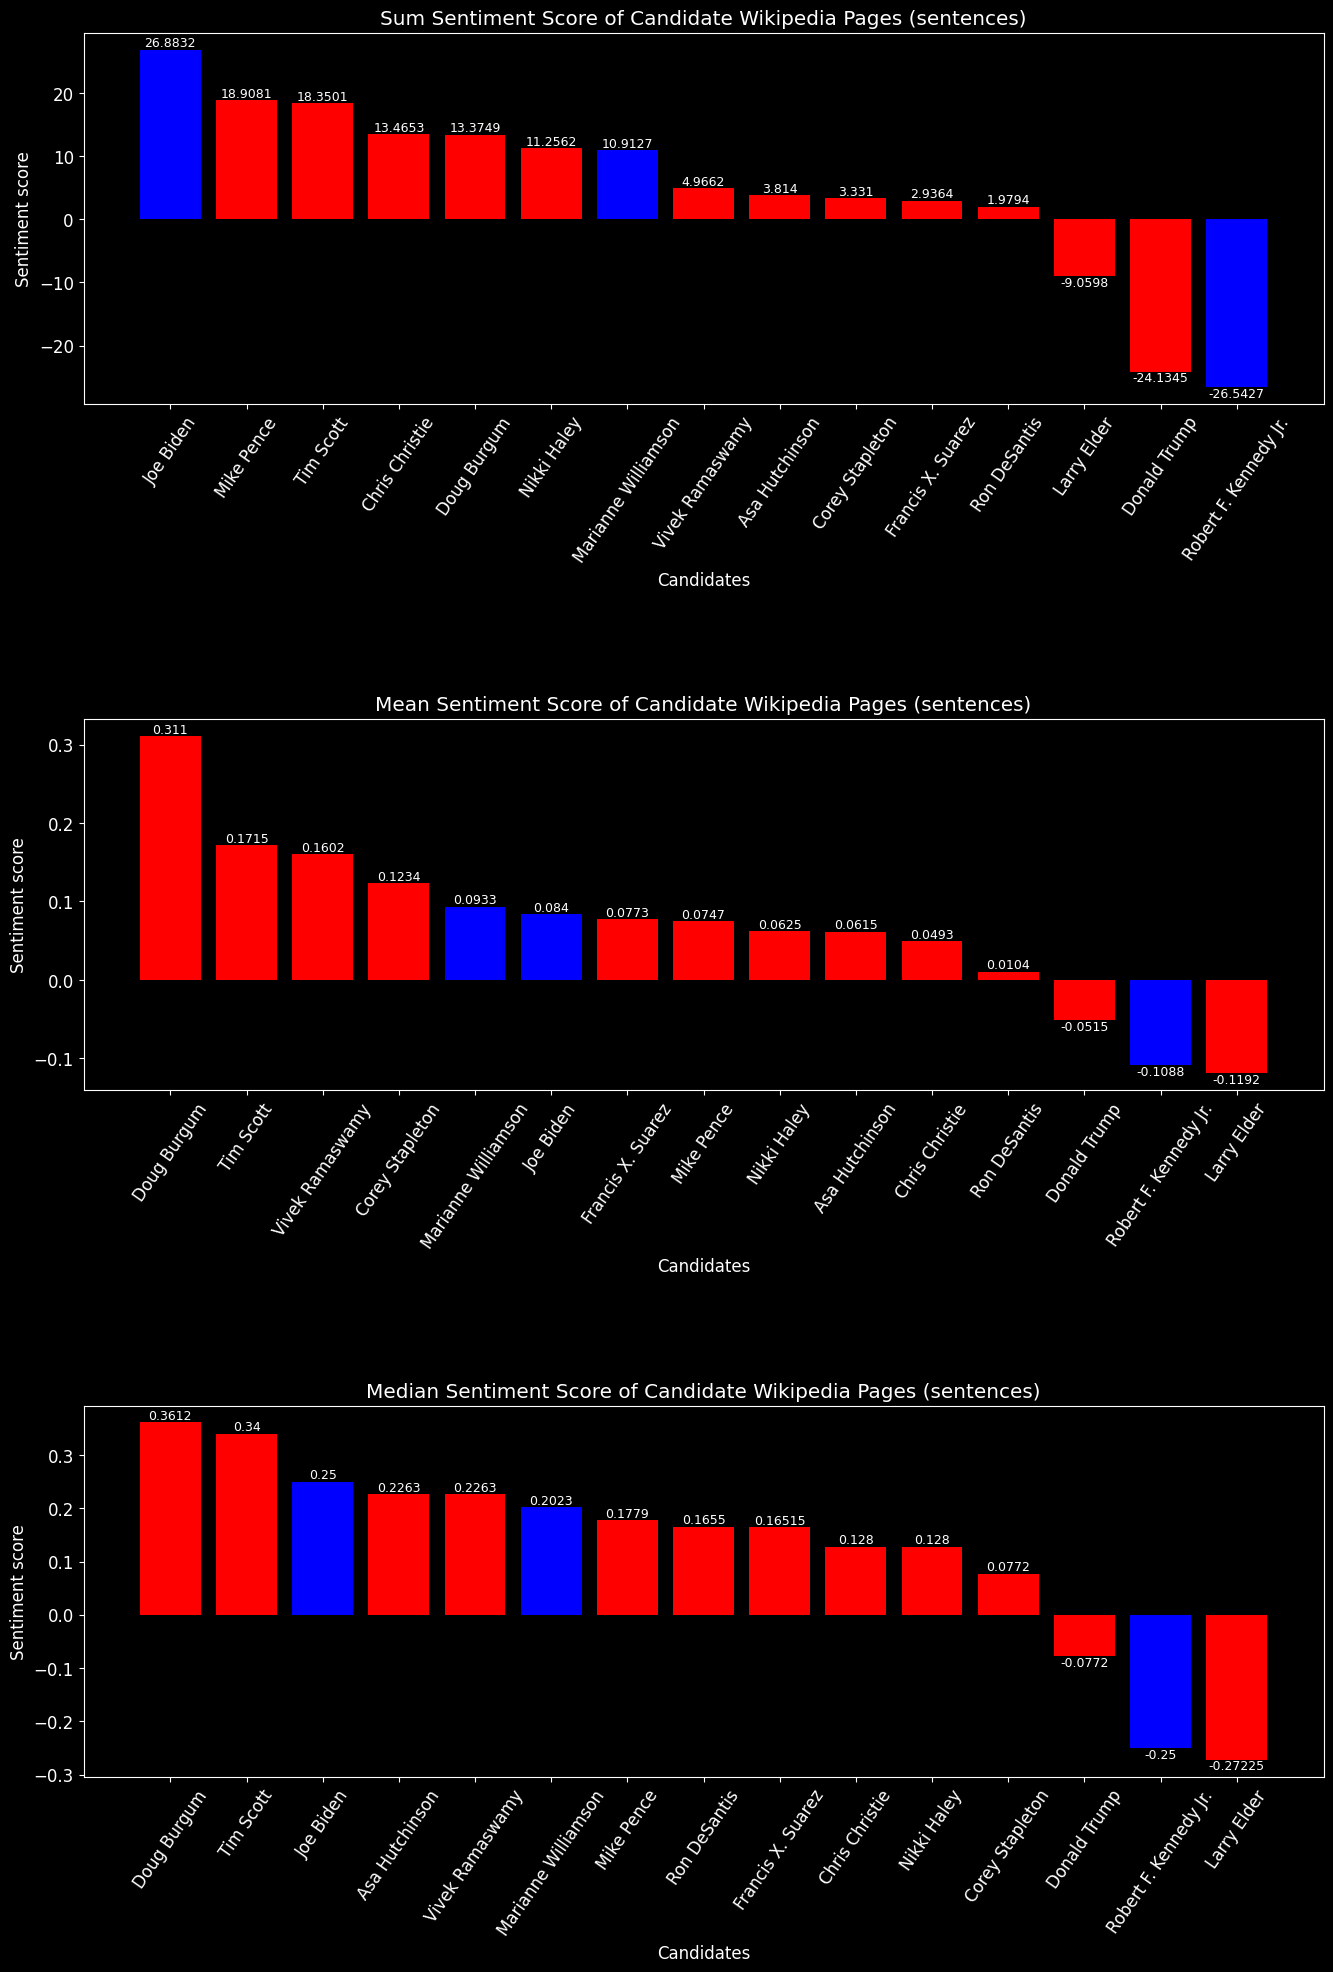

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 16))
plt.rc("font", size=12)  # controls default text sizes
plt.rc("axes", labelsize=16)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)

plt.subplots_adjust(top=1.2)  # Increase top margin


# Sum score
sum_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="sum_score", ascending=False)["party"]
]

p1 = ax1.bar(
    x=df_pagesen.sort_values(by="sum_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="sum_score", ascending=False)["sum_score"],
    data=df_pagesen,
    color=sum_colors,
)

ax1.set_ylabel("Sentiment score")
ax1.set_xlabel("Candidates")
ax1.set_title("Sum Sentiment Score of Candidate Wikipedia Pages (sentences)")
ax1.bar_label(p1, label_type="edge", fontsize=9)

ax1.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the first subplot

# Mean score
mean_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="mean_score", ascending=False)["party"]
]

p2 = ax2.bar(
    x=df_pagesen.sort_values(by="mean_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="mean_score", ascending=False)["mean_score"],
    data=df_pagesen,
    color=mean_colors,
)

ax2.set_ylabel("Sentiment score")
ax2.set_xlabel("Candidates")
ax2.set_title("Mean Sentiment Score of Candidate Wikipedia Pages (sentences)")
ax2.bar_label(p2, label_type="edge", fontsize=9)

ax2.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the second subplot

# Median score
median_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="median_score", ascending=False)["party"]
]

p3 = ax3.bar(
    x=df_pagesen.sort_values(by="median_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="median_score", ascending=False)["median_score"],
    data=df_pagesen,
    color=median_colors,
)

ax3.set_ylabel("Sentiment score")
ax3.set_xlabel("Candidates")
ax3.set_title("Median Sentiment Score of Candidate Wikipedia Pages (sentences)")
ax3.bar_label(p3, label_type="edge", fontsize=9)

ax3.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the third subplot

plt.subplots_adjust(hspace=0.85)  # Adjust the vertical spacing between subplots

plt.show()

## Helpful function

In [9]:
def dispersion_plot(
    text, words, ignore_case=False, title="Lexical Dispersion Plot", figsize=(12, 8)
):
    try:
        import matplotlib.pyplot as plt
    except ImportError as e:
        raise ImportError(
            "The plot function requires matplotlib to be installed. "
            "See https://matplotlib.org/"
        ) from e

    word2y = {}
    unique_words = []
    for word in words:
        word_key = word.casefold() if ignore_case else word
        if word_key not in word2y:
            word2y[word_key] = len(unique_words)
            unique_words.append(word)

    xs, ys = [], []
    for x, token in enumerate(text):
        token = token.casefold() if ignore_case else token
        y = word2y.get(token)
        if y is not None:
            xs.append(x)
            ys.append(y)

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(xs, ys, "|")
    ax.set_yticks(list(range(len(unique_words))), unique_words, color="C0")
    ax.set_ylim(-1, len(unique_words))
    ax.set_title(title)
    ax.set_xlabel("Word Offset")
    return ax

# A look at the inaugrual addresses of US presidents

In [10]:
with open(
    "/home/luke/projects/jupyterlab/Notebooks/Wikipedia_sentiment_analysis/Wiki-page-sentiment/speeches/Biden.txt"
) as f:
    biden_address = f.read()

with open(
    "/home/luke/projects/jupyterlab/Notebooks/Wikipedia_sentiment_analysis/Wiki-page-sentiment/speeches/Trump.txt"
) as f:
    trump_address = f.read()

with open(
    "/home/luke/projects/jupyterlab/Notebooks/Wikipedia_sentiment_analysis/Wiki-page-sentiment/speeches/Obama.txt"
) as f:
    obama_address = f.read()


In [11]:
# Remove stop words and punctuation
stops = stopwords.words("english")
for n in string.punctuation:
    stops.append(n)
additional_stops = ["==", "''", "'s", "``", "``", "———", "ISBN"]
for stop in additional_stops:
    stops.append(stop)

# Trump address
trump_tokens = word_tokenize(trump_address)
filtered_text_trump = [w for w in trump_tokens if not w.lower() in stops]


df_trump = pd.DataFrame(filtered_text_trump, columns=["trump_token"])
df_trump["trump_pos"] = [tag[1] for tag in nltk.pos_tag(df_trump["trump_token"])]

# Biden address
biden_tokens = word_tokenize(biden_address)

filtered_text_biden = [w for w in biden_tokens if not w.lower() in stops]
df_biden = pd.DataFrame(filtered_text_biden, columns=["biden_token"])
df_biden["biden_pos"] = [tag[1] for tag in nltk.pos_tag(df_biden["biden_token"])]


# Obama address
obama_tokens = word_tokenize(obama_address)

filtered_text_obama = [w for w in obama_tokens if not w.lower() in stops]
df_obama = pd.DataFrame(filtered_text_obama, columns=["obama_token"])
df_obama["obama_pos"] = [tag[1] for tag in nltk.pos_tag(df_obama["obama_token"])]

# Reagan address
Reagan_tokens = word_tokenize(Reagan_address)

filtered_text_Reagan = [w for w in Reagan_tokens if not w.lower() in stops]
df_Reagan = pd.DataFrame(filtered_text_Reagan, columns=["Reagan_token"])
df_Reagan["Reagan_pos"] = [tag[1] for tag in nltk.pos_tag(df_Reagan["Reagan_token"])]


# concat the dataframes
df = pd.concat([df_trump, df_biden], axis=1)
df = pd.concat([df, df_obama], axis=1)
df = pd.concat([df, df_Reagan], axis=1)

In [12]:
list_of_words_to_plot = [
    "God",
    "America",
    "country",
    "people",
    "Nation",
    "world",
    "democracy",
    "American",
    "history",
    "winning",
]


list_of_words_to_plot.reverse()

<Axes: title={'center': 'Dispersion Plot of Reagan Address'}, xlabel='Word Offset'>

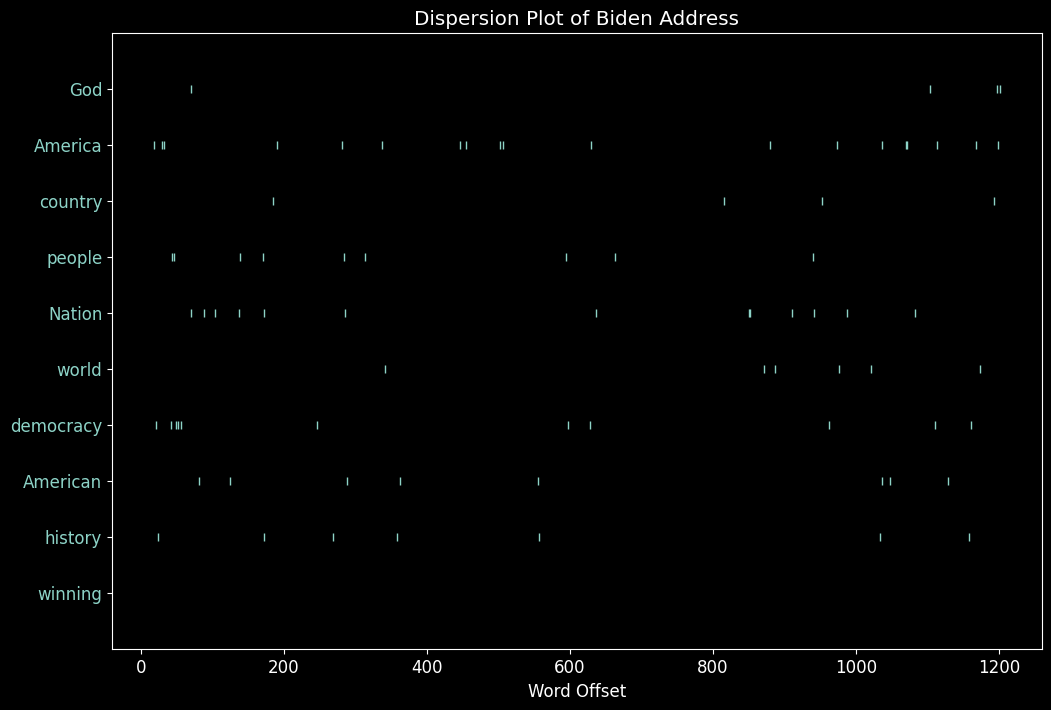

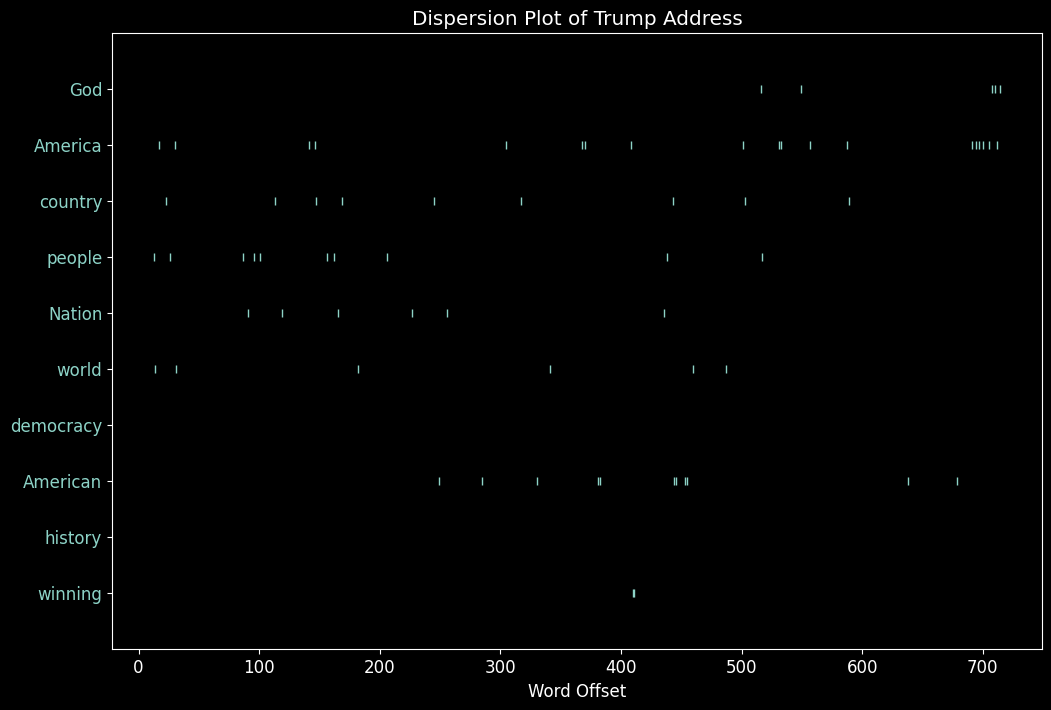

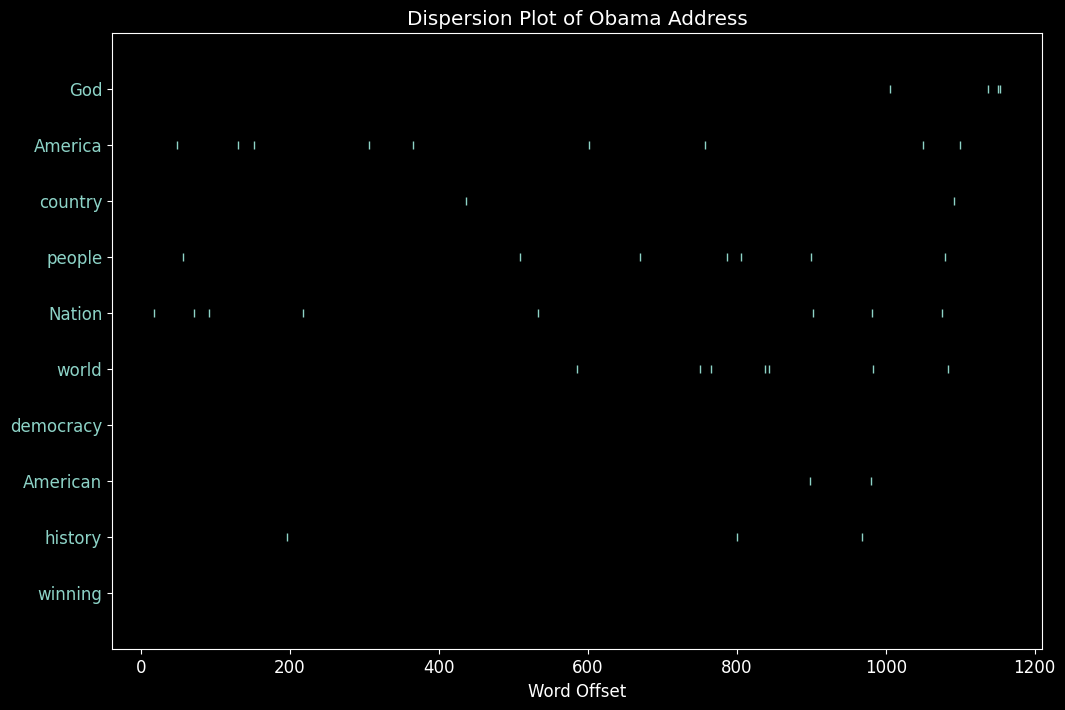

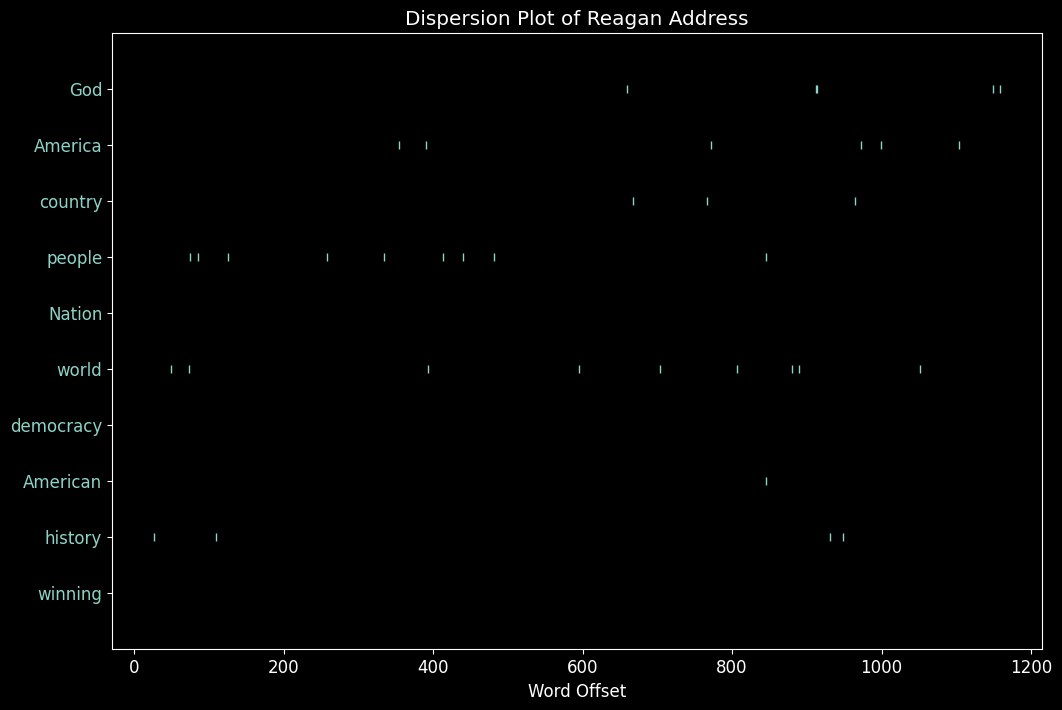

In [13]:
# Dispersion plot for Trump and biden tokens
dispersion_plot(
    df["biden_token"],
    list_of_words_to_plot,
    title="Dispersion Plot of Biden Address",
)

dispersion_plot(
    df["trump_token"],
    list_of_words_to_plot,
    title="Dispersion Plot of Trump Address",
)


dispersion_plot(
    df["obama_token"],
    list_of_words_to_plot,
    title="Dispersion Plot of Obama Address",
)

dispersion_plot(
    df["Reagan_token"],
    list_of_words_to_plot,
    title="Dispersion Plot of Reagan Address",
)

In [14]:
def dispersion_plot_stacked(
    texts,
    words,
    colors=None,
    labels=None,
    ignore_case=False,
    title="Lexical Dispersion Plot",
    figsize=(12, 8),
    tick_fontsize=10,
    marker_size=12,
):
    try:
        import matplotlib.pyplot as plt
    except ImportError as e:
        raise ImportError(
            "The plot function requires matplotlib to be installed. "
            "See https://matplotlib.org/"
        ) from e

    word2y = {}
    unique_words = []
    for word in words:
        word_key = word.casefold() if ignore_case else word
        if word_key not in word2y:
            word2y[word_key] = len(unique_words)
            unique_words.append(word)

    fig, ax = plt.subplots(figsize=figsize)

    if colors is None:
        colors = ["C0"] * len(texts)

    if labels is None:
        labels = [f"Speaker {i+1}" for i in range(len(texts))]

    for text, color, label in zip(texts, colors, labels):
        xs, ys = [], []
        for x, token in enumerate(text):
            token = token.casefold() if ignore_case else token
            y = word2y.get(token)
            if y is not None:
                xs.append(x)
                ys.append(y)
        ax.plot(xs, ys, "|", color=color, markersize=marker_size, label=label)

    ax.set_yticks(list(range(len(unique_words))), unique_words, color="C0")
    ax.set_ylim(-1, len(unique_words))
    ax.set_title(title)
    ax.set_xlabel("Word Offset")
    ax.tick_params(axis="y", labelsize=tick_fontsize)
    ax.legend(loc="best")
    return ax

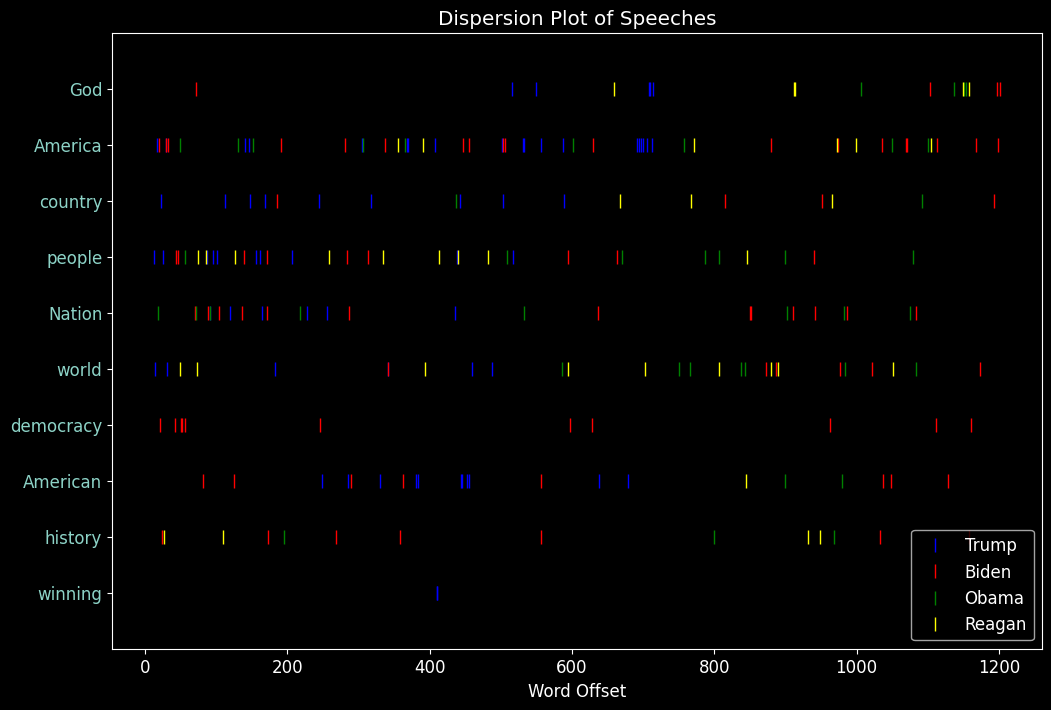

In [15]:
texts = [df["trump_token"], df["biden_token"], df["obama_token"], df["Reagan_token"]]
colors = ["blue", "red", "green", "yellow"]
labels = ["Trump", "Biden", "Obama", "Reagan"]

dispersion_plot_stacked(
    texts,
    list_of_words_to_plot,
    colors=colors,
    labels=labels,
    title="Dispersion Plot of Speeches",
    tick_fontsize=12,
    marker_size=10,
)

plt.show()

# Continued Inugural address analysis

In [ ]:
with open(
    "speeches/Biden.txt"
) as f:
    biden_address = f.read()

with open(
    "speeches/Trump.txt"
) as f:
    trump_address = f.read()

with open(
    "speeches/Obama.txt"
) as f:
    obama_address = f.read()

with open(
    
)

with open(
    "speeches/Reagan.txt"
) as f:
    reagan_address = f.read()
)


In [17]:
# continue the above pattern for each of the files in the speeches folder
with open(
    "/home/luke/projects/jupyterlab/Notebooks/Wikipedia_sentiment_analysis/Wiki-page-sentiment/speeches/WBush.txt"
) as f:
    bush_address = f.read()

with open(
    "/home/luke/projects/jupyterlab/Notebooks/Wikipedia_sentiment_analysis/Wiki-page-sentiment/speeches/Reagan.txt"
) as f:
    Reagan_address = f.read()
